In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime, timedelta
from IPython.display import HTML

%matplotlib widget

def load_gps_data(file_path):
    """JSONファイルからGPSデータを読み込む"""
    try:
        with open(file_path, 'r') as f:
            raw_data = json.load(f)
        
        processed = []
        for entry in raw_data:
            try:
                time = datetime.utcfromtimestamp(int(entry['unixTime'])/1000)+ timedelta(hours=9)
                lat = float(entry['latitude'])
                lon = float(entry['longitude'])
                image_length = int(entry.get('imageLength', '0'))
                processed.append({'time': time, 'lat': lat, 'lon': lon, 'image_length': image_length})
            except (KeyError, ValueError) as e:
                print(f"スキップされた不正なデータ: {entry} | エラー: {e}")
        
        return sorted(processed, key=lambda x: x['time'])
    
    except Exception as e:
        print(f"エラー発生: {str(e)}")
        return []

gps_data = load_gps_data("C:\\Users\\showe\\Desktop\\experiment\\data\\2025_01_27\\clean\\log_miyakita3276.json")



In [ ]:
if not gps_data:
    print("有効なデータがありません")
else:
    # 中心座標を指定
    centerLatitude = 37.86678
    centerLongitude = 138.93920
    
    # 正方形の範囲を定義
    half_side = 0.001
    xlim = [centerLongitude - half_side, centerLongitude + half_side]
    ylim = [centerLatitude - half_side, centerLatitude + half_side]

    # 全体の範囲を取得（余裕を持たせた範囲）
    all_lons = [d['lon'] for d in gps_data]
    all_lats = [d['lat'] for d in gps_data]
    ax.set_xlim(min(all_lons)-0.001, max(all_lons)+0.001)
    ax.set_ylim(min(all_lats)-0.001, max(all_lats)+0.001)

    # プロットの準備
    fig, ax = plt.subplots(figsize=(10, 6))
    point = ax.scatter([], [], c='r', s=100, edgecolors='k', zorder=3)

    # 正方形を描画
    square_x = [xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]]
    square_y = [ylim[0], ylim[0], ylim[1], ylim[1], ylim[0]]
    ax.plot(square_x, square_y, 'k--', alpha=0.5)

    # 軸の設定
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    def update(frame):
        if frame >= len(gps_data):
            return point,  # もうデータがない場合
        
        current = gps_data[frame]  # 現在のフレームのデータを取得
        lon = current['lon']
        lat = current['lat']
        image_length = current['image_length']  # 現在の点のimageLength
        color = 'r' if image_length > 0 else 'gray'  # imageLengthが1以上なら赤、0なら灰色
        
        # 点の位置と色を更新
        point.set_offsets(np.c_[lon, lat])
        point.set_color(color)
        
        # タイトルを更新
        ax.set_title(f"{current['time'].strftime('%Y-%m-%d %H:%M:%S')}\n"
                     f"Lat: {lat:.6f}°, Lon: {lon:.6f}°")
        
        return point,

    ani = animation.FuncAnimation(
        fig, update,
        frames=len(gps_data),
        interval=50,
        blit=False
    )
    
    # アニメーションを保存
    ani.save('anim.mp4', writer="ffmpeg")
    #plt.show()
    #HTML(ani.to_html5_video())

C:\Users\showe\AppData\Local\Temp\ipykernel_22212\1937899764.py:20: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  time = datetime.utcfromtimestamp(int(entry['unixTime'])/1000)+ timedelta(hours=9)


スキップされた不正なデータ: {'from': 'miyakita1028', 'unixTime': '1737945773196', 'event': 'startSearch'} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita1028', 'to': 'miyakita7314', 'event': 'endpointFound', 'unixTime': 1737945773293} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita1028', 'to': 'miyakita7314', 'event': 'connected', 'unixTime': 1737945778432} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita1028', 'to': 'miyakita7314', 'event': 'sendStart', 'unixTime': 1737945778575} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita1028', 'to': 'miyakita7314', 'event': 'discconected', 'unixTime': 1737945879242} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita1028', 'to': 'miyakita3276', 'event': 'endpointFound', 'unixTime': 1737945889561} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita1028', 'to': 'miyakita4782', 'event': 'endpointFound', 'unixTime': 1737945893054} | エラー: 'latitude'
スキップされた不正なデータ: {'from': 'miyakita1028', 'to': 'miyakita3276', 'event': 'connected', 'unixTime': 1737

C:\Users\showe\AppData\Local\Temp\ipykernel_22212\1937899764.py:45: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter_list.append(ax.scatter([], [], c=colors[idx], s=100, edgecolors='k', zorder=3))


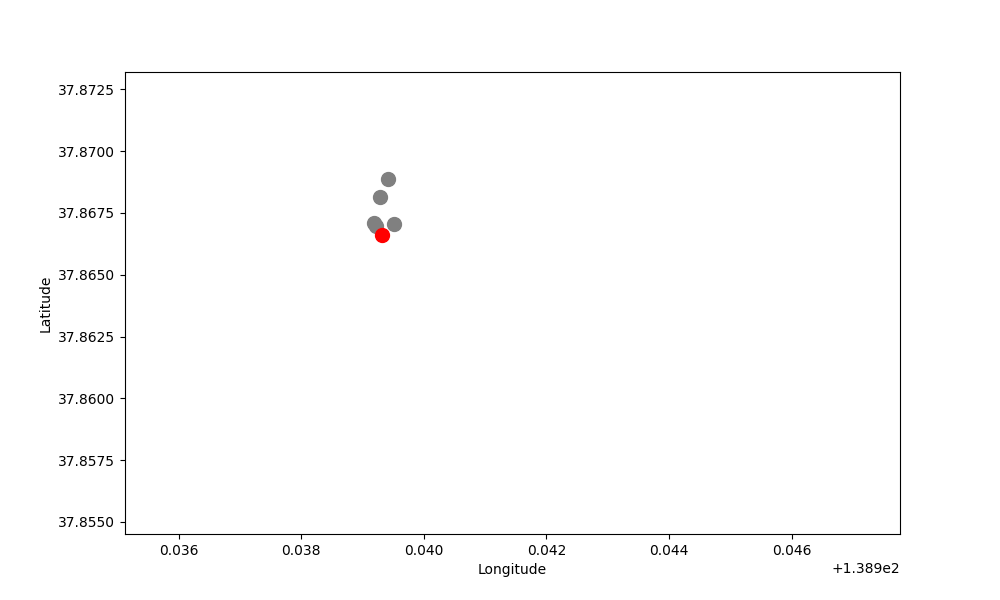

In [3]:

import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime, timedelta
from IPython.display import HTML

%matplotlib widget

def load_gps_data(file_path):
    """JSONファイルからGPSデータを読み込む"""
    try:
        with open(file_path, 'r') as f:
            raw_data = json.load(f)
        
        processed = []
        for entry in raw_data:
            try:
                time = datetime.utcfromtimestamp(int(entry['unixTime'])/1000)+ timedelta(hours=9)
                lat = float(entry['latitude'])
                lon = float(entry['longitude'])
                image_length = int(entry.get('imageLength', '0'))
                processed.append({'time': time, 'lat': lat, 'lon': lon, 'image_length': image_length})
            except (KeyError, ValueError) as e:
                print(f"スキップされた不正なデータ: {entry} | エラー: {e}")
        
        return sorted(processed, key=lambda x: x['time'])
    
    except Exception as e:
        print(f"エラー発生: {str(e)}")
        return []

# ディレクトリ内のJSONファイルをすべて読み込み
data_dir = "C:\\Users\\showe\\Desktop\\experiment\\data\\2025_01_27\\clean\\"
json_files = [f for f in os.listdir(data_dir) if f.endswith(".json")]
all_gps_data = [load_gps_data(os.path.join(data_dir, f)) for f in json_files if load_gps_data(os.path.join(data_dir, f))]

# 各データセットごとに散布図を作成
fig, ax = plt.subplots(figsize=(10, 6))
scatter_list = []
colors = plt.cm.rainbow(np.linspace(0, 1, len(all_gps_data)))

for idx, dataset in enumerate(all_gps_data):
    scatter_list.append(ax.scatter([], [], c=colors[idx], s=100, edgecolors='k', zorder=3))

# 全データで描画範囲を設定
all_lons = [d['lon'] for gps_data in all_gps_data for d in gps_data]
all_lats = [d['lat'] for gps_data in all_gps_data for d in gps_data]
ax.set_xlim(min(all_lons)-0.001, max(all_lons)+0.001)
ax.set_ylim(min(all_lats)-0.001, max(all_lats)+0.001)

# 軸ラベル設定
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

def update(frame):
    artists = []
    for i, gps_data in enumerate(all_gps_data):
        if frame < len(gps_data):
            current = gps_data[frame]
            lon = current['lon']
            lat = current['lat']
            image_length = current['image_length']  # 現在の点のimageLength
            color = 'r' if image_length > 0 else 'gray'  # imageLengthが1以上なら赤、0なら灰色
        
            # 点の位置と色を更新
            scatter_list[i].set_offsets(np.c_[lon, lat])
            scatter_list[i].set_color(color)
            scatter_list[i].set_offsets(np.c_[lon, lat])
        artists.append(scatter_list[i])
    return tuple(artists)

max_frames = max(len(g) for g in all_gps_data)
ani = animation.FuncAnimation(
    fig, update,
    frames=max_frames,
    interval=50,
    blit=False
)

ani.save('anim_multi.mp4', writer="ffmpeg")

C:\Users\showe\AppData\Local\Temp\ipykernel_14452\3954549880.py:19: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  time = datetime.utcfromtimestamp(int(entry['unixTime'])/1000)+ timedelta(hours=9)


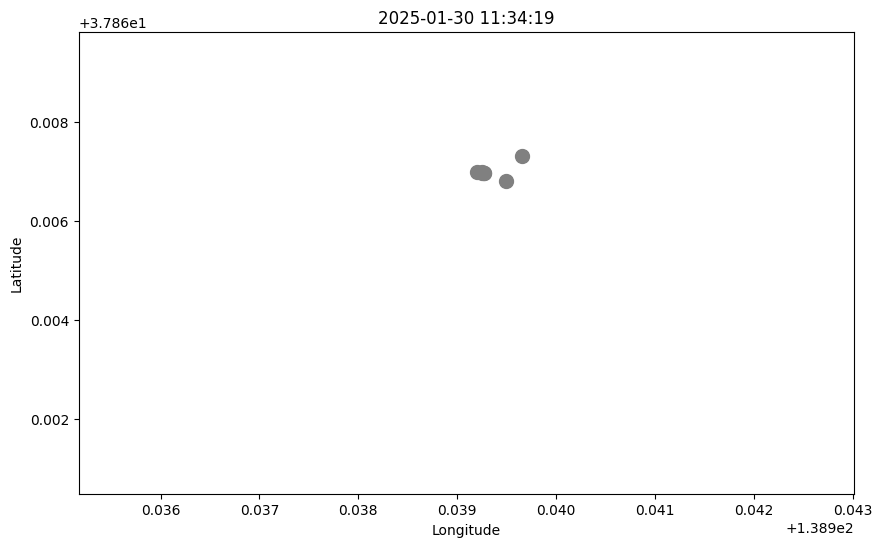

In [1]:
# ...existing code...

import os
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from datetime import datetime, timedelta
from IPython.display import HTML

def load_gps_data(file_path):
    try:
        with open(file_path, 'r') as f:
            raw_data = json.load(f)
        processed = []
        for entry in raw_data:
            try:
                time = datetime.utcfromtimestamp(int(entry['unixTime'])/1000)+ timedelta(hours=9)
                lat = float(entry['latitude'])
                lon = float(entry['longitude'])
                image_length = int(entry.get('imageLength', '0'))
                processed.append({'time': time, 'lat': lat, 'lon': lon, 'image_length': image_length})
            except (KeyError, ValueError):
                pass
        return sorted(processed, key=lambda x: x['time'])
    except:
        return []

data_dir = "C:\\Users\\showe\\Desktop\\experiment\\clean\\2025_01_30"
json_files = glob.glob(os.path.join(data_dir, "*.json"))
all_gps_data = [load_gps_data(f) for f in json_files]
all_gps_data = [d for d in all_gps_data if d]

if not all_gps_data:
    print("有効なデータがありません")
else:
    # 全データから最小・最大時刻を算出
    min_time = min(min(d['time'] for d in ds) for ds in all_gps_data)
    max_time = max(max(d['time'] for d in ds) for ds in all_gps_data)

    # 10秒刻みのタイムリストを生成
    frame_times = []
    current = min_time
    while current <= max_time:
        frame_times.append(current)
        current += timedelta(seconds=10)

    # グラフ初期化
    fig, ax = plt.subplots(figsize=(10, 6))
    scatter_list = []
    colors = plt.cm.rainbow(np.linspace(0, 1, len(all_gps_data)))
    for c in colors:
        scatter_list.append(ax.scatter([], [], c=[c], s=100, edgecolors='k', zorder=3))

    # 描画範囲設定
    all_lons = [d['lon'] for ds in all_gps_data for d in ds]
    all_lats = [d['lat'] for ds in all_gps_data for d in ds]
    ax.set_xlim(min(all_lons) - 0.001, max(all_lons) + 0.001)
    ax.set_ylim(min(all_lats) - 0.001, max(all_lats) + 0.001)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # 指定時刻以下で最も近いポイントを取得する関数
    def get_position_at_time(dataset, t):
        vals = [p for p in dataset if p['time'] <= t]
        if not vals:  # データが無い場合はNone
            return None
        return vals[-1]  # 時間がt以下のうち最後の要素

    def update(frame):
        t = frame_times[frame]
        for i, ds in enumerate(all_gps_data):
            pos = get_position_at_time(ds, t)
            if pos:
                scatter_list[i].set_offsets(np.c_[pos['lon'], pos['lat']])
                color = 'r' if pos['image_length'] > 0 else 'gray'
                scatter_list[i].set_color(color)
        ax.set_title(f"{t.strftime('%Y-%m-%d %H:%M:%S')}")
        return scatter_list

    ani = animation.FuncAnimation(
        fig, update,
        frames=len(frame_times),
        interval=50,
        blit=False
    )
    ani.save('anim_multi_synced2.mp4', writer='ffmpeg')

# ...existing code...